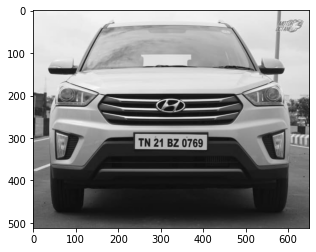

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt 
import imutils
car_img=cv.imread(r"C:\Users\nariv\Desktop\Project\DSC03565.jpg")
car_img_gray=cv.cvtColor(car_img,cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(car_img_gray,cv.COLOR_BGR2RGB))

In [3]:
blateral_filter=cv.bilateralFilter(car_img_gray,11,12,15)
plt.imshow(cv.cvtColor(blateral_filter,cv.COLOR_BGR2RGB))